# Calculation of the electron charge e by minimzation of chi-squared analysis

#### Done for PHYS 2605 Millikan Oil Drop experiment

### Authors: Aditya Pidaparti and Erik Wasleske

Our first step is to import necessary libraries. For this project, we'll need numpy, pandas, and matplotlib

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Next, we'll import our data using pandas' default read_csv function.

In [2]:
data = pd.read_csv('chi-squared-data.csv')

Here, I halve the error due to the droplets core size being less than 1/64 of an inch in error. They actually tended to be far smaller, but to stay safe, 1/16 * 1/4 of an inch is used for error here.

In [3]:
data['δ Charge C )(10^-19)'] = data['δ Charge C )(10^-19)']/2
data

,Drop,Average Charge (C )(10^-19),δ Charge C )(10^-19)
0,1,-17.867794,0.200009
1,2,-19.602169,0.194181
2,3,-18.976354,0.386856
3,6,-7.505119,0.159900
4,10,-3.647575,0.334236
5,11,-2.169582,0.126538
6,14,-1.068135,0.062226
7,15,-2.062686,0.097329
8,16,-1.152863,0.072329
9,17,-2.149017,0.129148


The next step is to make our predictions array with potential values of e. Keep in mind the accepted value of e is -1.60217662 × 10^-19 coulombs. Our predictions will vary from 0.6e to 4e. Also, to make sure floating point doesn't become an issue, all calculations will be done without the 10^-19 prefactor.

In [4]:
start_multiplier = .6
end_multiplier = 10
delimeter = .001
multipliers = np.arange(start_multiplier, end_multiplier, delimeter)
e = -1.60217662
# print ("Multipliers:", multipliers)
predictions = multipliers * e
# print ("Predictions for e:", predictions)

Now that we've got our predictions, we need to run chi-squared analysis on each prediction. 

Steps we'll take:
1. Pick a predicted value of e, the basic unit of electric charge.
2. Calculate the amount of charge in terms of e on the drop.
3. Make a prediction for what the charge should be for each drop using rounding to nearest integer.
4. Do a chi-squared goodness-of-fit test.
5. Save the result alongside the prediction in an ordered pair
6. Repeat 1-5 for all predictions of e.
7. Plot results.

### Example of analysis using the actual value of e:

In [5]:
test = data.copy()
test["q/e"] = round(test["Average Charge (C )(10^-19)"]/e,2)
test["Expected q/e"] = round(test["q/e"],0)
test["chi_value_squared"] = ((test["q/e"] - test["Expected q/e"]) / (test["δ Charge C )(10^-19)"]) )** 2
print ("Chi-Squared value using the accepted value of e as a prediction:", test["chi_value_squared"].sum())
test

Chi-Squared value using the accepted value of e as a prediction: 73.4132818737211


,Drop,Average Charge (C )(10^-19),δ Charge C )(10^-19),q/e,Expected q/e,chi_value_squared
0,1,-17.867794,0.200009,11.15,11.0,0.562448
1,2,-19.602169,0.194181,12.23,12.0,1.402955
2,3,-18.976354,0.386856,11.84,12.0,0.171057
3,6,-7.505119,0.159900,4.68,5.0,4.005019
4,10,-3.647575,0.334236,2.28,2.0,0.701796
5,11,-2.169582,0.126538,1.35,1.0,7.650543
6,14,-1.068135,0.062226,0.67,1.0,28.124450
7,15,-2.062686,0.097329,1.29,1.0,8.877834
8,16,-1.152863,0.072329,0.72,1.0,14.986388
9,17,-2.149017,0.129148,1.34,1.0,6.930793


## Now for the real analysis:

In [6]:
results = []
degFreedom = 9
for prediction in predictions:
    test = data.copy()
    test["q/e"] = round(test["Average Charge (C )(10^-19)"]/prediction,2)
    test["Expected q/e"] = round(test["q/e"],0)
    test["chi_value_squared"] = ((test["q/e"] - test["Expected q/e"]) / (test["δ Charge C )(10^-19)"]) )** 2
    chiSquared = test["chi_value_squared"].sum()
    reducedChiSquared = chiSquared / degFreedom #Do the reduced chi squared value
    results.append((prediction, reducedChiSquared))

In [7]:
# for result in results:
#     print (result)
# Uncomment to see all results

Now, we have our results. Time to plot them and find a minimum

## Plotting results

So, since results are saved as ordered pairs, but we need to have two arrays of the x-values and y-values, we'll separate them.

In [8]:
x_vals = []
y_vals = []
for result in results:
    x_vals.append(result[0]) #predicted value of e
    y_vals.append(result[1]) #resulting reduced chi-squared value

Now that our data is cleaned and ready, we'll plot it. We will be generating two plots: one to identify the chi-squared values for a prediction of e, and the other to find the chi-squared + 1 value to measure the variance of e.

In [9]:
sns.set_style("whitegrid")
sns.set_context("paper")
def seabornPlot():
    chi_vs_e = plt.plot(x_vals,y_vals)
    plt.xlabel("Predicted value of e (10^ -19 C)")
    plt.ylabel("Reduced Chi-Squared value")
    plt.title("Determining the value of e, the value of one electron's charge")
    axes = plt.gca()
    axes.set_xlim([-1.4,-1.8])
    plt.show()

def reducedPlot():
    chi_vs_e = plt.plot(x_vals,y_vals)
    plt.xlabel("Predicted value of e (10^ -19 C)")
    plt.ylabel("Reduced Chi-Squared value")
    plt.title ("Determining the uncertainty in our prediction of e")
    axes = plt.gca()
    axes.set_xlim([-7,-.9])
    plt.show()

We are going to assume the value of e is within the range of (-1.4 to -1.8) * 10^-19 Coulombs, based off the accepted value. Our reasoning for doing so is to find a local minimum that is not a quantized value that is an integer fraction of e.

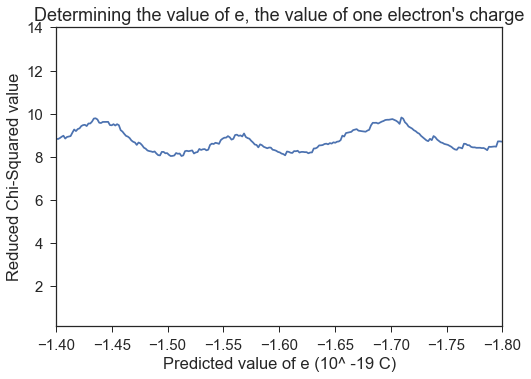

In [29]:
sns.set_context("paper")
sns.set(font_scale=1.5)
sns.set_style("ticks")
seabornPlot() #We need to find the local minimum in this range

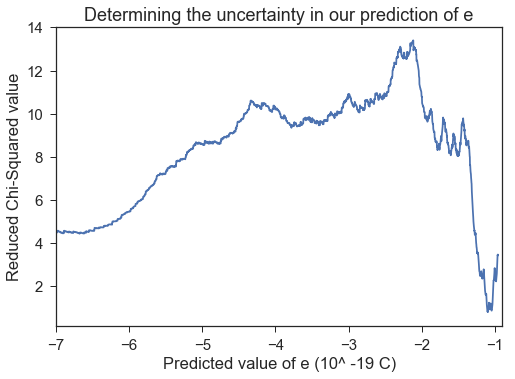

In [30]:
reducedPlot()

In [12]:
start_val = .9*e
end_val = 1.1*e
min_chi = 10 ** 10
min_e = 0
for result in results:
    if result[0] < start_val and result[0] > end_val:
        if min_chi > result[1]:
            min_chi = result[1]
            min_e = result[0]
print (min_e, min_chi)

-1.50284166956 8.042056284191897


In [13]:
var_e_left = 0
var_e_right = 0
min_chi_plus_one_left = 0
min_chi_plus_one_right = 0
for result in results:
    if result[0] > min_e: #First find the right variance paramter 
#         print (abs(result[1]))
        if abs(result[1] - (min_chi+1)) < .05: #Smallest parameter that was needed to 
            var_e_right = result[0]
            min_chi_plus_one_right = result[1]
    if result[0] < min_e: #Now we find the left parameter
        if abs(result[1] - (min_chi+1)) < .01:
            var_e_left = result[0]
            min_chi_plus_one_left = result[1]
            break
print (var_e_left, var_e_right,min_chi_plus_one_left, min_chi_plus_one_right)

-1.5621222045 -1.46118507744 9.032624701908869 9.071240690942993


The results I get are a predicted value of e of -(1.50 +- .06) * 10 ^ -19 Coulombs. This is still within 2 uncertainties of the accepted value of e.

In addition, in the range shown in the first chart above, we can see a 2nd local minimum. We will now calculate that as well.

In [14]:
second_start = -1.55
second_end = -1.7
second_min_chi = 10 ** 10
second_min_e = 0
for result in results:
    if result[0] < second_start and result[0] > second_end:
        if second_min_chi > result[1]:
            second_min_chi = result[1]
            second_min_e = result[0]
print (second_min_e, second_min_chi)

second_var_e_left = 0
second_min_chi_plus_one_left = 0
second_var_e_right = 0
second_min_chi_plus_one_right = 0
for result in results:
    if result[0] > second_min_e: #Right first
        if abs(result[1] - (second_min_chi+1)) < .05:
            second_var_e_right = result[0]
            second_min_chi_plus_one_right = result[1]
    if result[0] < second_min_e: #Then left
        if abs(result[1] - (second_min_chi+1)) < .002:
            second_var_e_left = result[0]
            second_min_chi_plus_one_left = result[1]
            break
print (second_var_e_left, second_var_e_right, second_min_chi_plus_one_left, second_min_chi_plus_one_right)
print (second_min_e)
print (second_min_e-second_var_e_left, second_min_e-second_var_e_right)

-1.60538097324 8.076514618172991
-1.72554421974 -1.56853091098 9.07772861898588 9.087061566721633
-1.60538097324
0.1201632465 -0.03685006226


Our second guess for the value of e would then be (-1.61 +- .12) * 10 ^ -19 C. This is within 1 uncertainty of the accepted value of e., so this minimum confirms Millikan's oil drop experiment as well. The sets of multiple minimums that are quite close to each other (reduced chi-squared values of 8.04 and 8.08) likely correspond to multiple data points agreeing on one local minimum while multiple points agree on another. We see the convergence of all data points in agreement as the predicted quantized charge goes to zero, as the reduced-chi-squared value falls rapidly as we approach 1/2 the accepted value of e, shown above in the 2nd plot. This agrees with predictions, as any error/uncertainty in data will cause points to be slightly out of alignment in a prediction, but as the predicted e gets smaller and smaller, the points will come more into alignment as more integer multiples are possible for charge quantization.